In [1]:
# !pip install -q numpy pandas matplotlib scikit-learn tensorflow


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# (Since i removed the review column in my laptop environment so this one has columns)
train_df = pd.read_csv('/content/drive/MyDrive/NLP/Train_without_review.csv')
test_df  = pd.read_csv('/content/drive/MyDrive/NLP/Test_without_review.csv')

# Convert polarity to 0 and 1
train_df['polarity'] = train_df['polarity'].map({1: 0, 2: 1})
test_df['polarity'] = test_df['polarity'].map({1: 0, 2: 1})

# Combining title and review into single text column
# train_df['text'] = train_df['title'] + " " + train_df['review']
# test_df['text']  = test_df['title'] + " " + test_df['review']

train_df['text'] = train_df['title']
test_df['text']  = test_df['title']

train_df['text'] = train_df['text'].astype(str)
test_df['text']  = test_df['text'].astype(str)



In [ ]:
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(train_df['text'])
# total_unique_words = len(tokenizer.word_index)

# print("Total unique words in corpus:", total_unique_words)

Total unique words in corpus: 225114


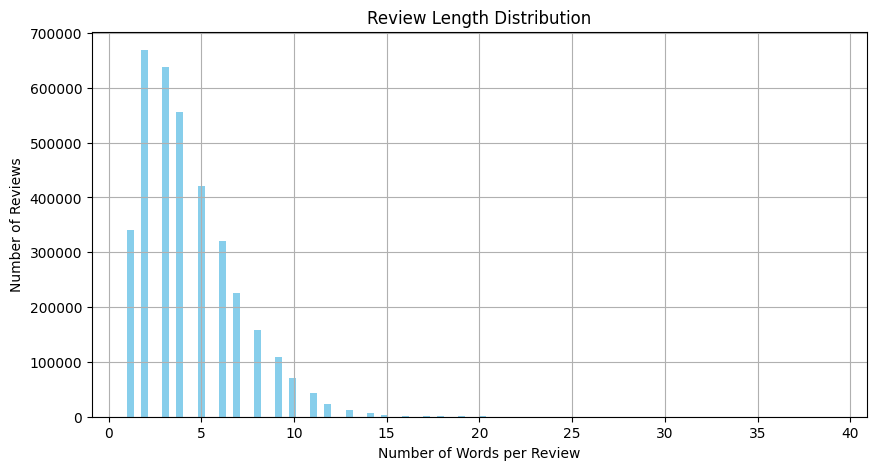

90th percentile: 8.0
95th percentile: 9.0
99th percentile: 12.0


In [ ]:
# # Compute review lengths
# review_lengths = train_df['text'].apply(lambda x: len(x.split()))

# # Plot histogram
# plt.figure(figsize=(10,5))
# plt.hist(review_lengths, bins=100, color='skyblue')
# plt.title('Review Length Distribution')
# plt.xlabel('Number of Words per Review')
# plt.ylabel('Number of Reviews')
# plt.grid(True)
# plt.show()

# # Check percentiles
# print("90th percentile:", np.percentile(review_lengths, 90))
# print("95th percentile:", np.percentile(review_lengths, 95))
# print("99th percentile:", np.percentile(review_lengths, 99))


In [6]:
vocab_size = 15000
max_len = 16

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(train_df['text'])

X_train = tokenizer.texts_to_sequences(train_df['text'])
X_test = tokenizer.texts_to_sequences(test_df['text'])

X_train = pad_sequences(X_train, maxlen=max_len, padding='post', truncating='post')
X_test  = pad_sequences(X_test,  maxlen=max_len, padding='post', truncating='post')

y_train = train_df['polarity'].values
y_test  = test_df['polarity'].values


In [7]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    SimpleRNN(128),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4, batch_size=1792)

Epoch 1/4
2009/2009 ━━━━━━━━━━━━━━━━━━━━ 383s 189ms/step - accuracy: 0.8338 - loss: 0.3586 - val_accuracy: 0.8665 - val_loss: 0.2950
Epoch 2/4
2009/2009 ━━━━━━━━━━━━━━━━━━━━ 387s 192ms/step - accuracy: 0.8705 - loss: 0.2878 - val_accuracy: 0.8691 - val_loss: 0.2928
Epoch 3/4
2009/2009 ━━━━━━━━━━━━━━━━━━━━ 379s 188ms/step - accuracy: 0.8797 - loss: 0.2708 - val_accuracy: 0.8719 - val_loss: 0.2856
Epoch 4/4
2009/2009 ━━━━━━━━━━━━━━━━━━━━ 388s 193ms/step - accuracy: 0.8862 - loss: 0.2583 - val_accuracy: 0.8712 - val_loss: 0.2858


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 16, 128)        │     1,920,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,859,077 (22.35 MB)

 Trainable params: 1,953,025 (7.45 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,906,052 (14.90 MB)

12500/12500 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step
              precision    recall  f1-score   support

           0       0.90      0.84      0.87    200000
           1       0.85      0.91      0.88    200000

    accuracy                           0.87    400000
   macro avg       0.87      0.87      0.87    400000
weighted avg       0.87      0.87      0.87    400000



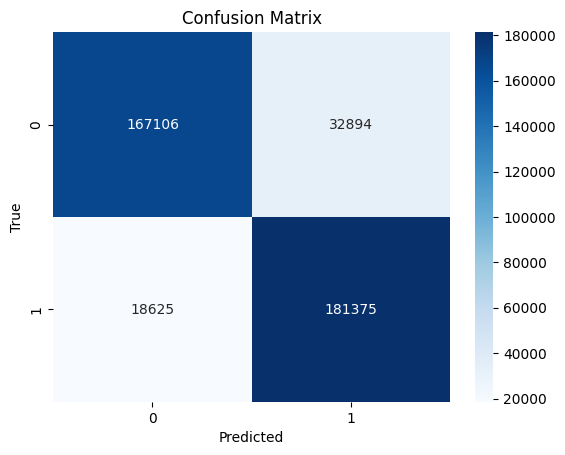

In [10]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
